In [1]:
import pandas as pd
import numpy as np
import timeit

from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20.0, 10.0)
from matplotlib import colors

import scipy.stats

## Publication data

In [2]:
# authorPublicationData = pd.read_csv('data/author_publications_1970_2016_asiansAsNone.txt')
authorPublicationData = pd.read_csv('data/author_publications_2017_asiansAsNone.txt')
authorPublicationData.head()

,author,year,pub_id
0,graeme earl,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
1,gareth beale,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,m. nasser,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,faisal zaman,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
4,altaf hossain,2009,001c8744-73c4-4b04-9364-22d31a10dbf1


In [3]:
author_year_numPub = authorPublicationData.groupby(['author', 'year'])['pub_id'].count()

In [4]:
author_year_numPub.head()

author                 year
'maseka lesaoana       2001    1
                       2015    1
(max) zong-ming cheng  2009    1
                       2011    1
(zhou) bryan bai       2011    1
Name: pub_id, dtype: int64

In [5]:
author_year_publications = authorPublicationData.groupby(['author', 'year'])['pub_id'].apply(list)

In [6]:
author_year_publications.head()

author                 year
'maseka lesaoana       2001    [4ff8ca7b-16b7-4bc8-b235-1eeac9b2aefa]
                       2015    [2a10f544-51ac-4261-8a26-cf61c1abdc03]
(max) zong-ming cheng  2009    [fe824193-57a4-48ed-a1d3-5eeb67929ae4]
                       2011    [fd54f6e8-4b10-471b-a1d0-3c784688a2a7]
(zhou) bryan bai       2011    [53d10a61-f01d-464e-b5e9-8242ed3b9e00]
Name: pub_id, dtype: object

## Author citation data (ids)

In [7]:
authorCitationsData = pd.read_csv('./data/citations_2017_asiansAsNone.txt')

In [8]:
authorCitationsData.head()
print(authorCitationsData.shape)

(25161834, 3)


In [9]:
paper_citation_count = authorCitationsData.groupby('id2')['id1'].count()

## Author citation network, paper -> author

In [10]:
citations_year_auth = pd.read_csv('./data/authors_cite_2017_asiansAsNone_by_daniel_grouped.txt')

In [11]:
citations_year_auth.head()

,author,year_cit,cit_count
0,'maseka lesaoana,2002.0,1
1,'maseka lesaoana,2003.0,1
2,'maseka lesaoana,2004.0,1
3,'maseka lesaoana,2005.0,2
4,'maseka lesaoana,2006.0,4


In [12]:
final_citation_count = citations_year_auth.groupby('author')['cit_count'].sum()

## Author career information

In [13]:
credible_authors = pd.read_csv('data/authors-scientific-atleast-5-year.csv')

In [14]:
credible_authors.set_index('author', inplace=True, )

In [15]:
credible_authors.head(10)

,start_year,end_year,num_pub,career_length
author,,,,
'maseka lesaoana,2001,2015,2,15
a aart blokhuis,1992,2005,2,14
a min tjoa,1979,2017,191,39
a-imam al-sammak,1992,2006,3,15
a-long jin,2011,2016,9,6
a-nasser ansari,2003,2009,10,7
a-xing zhu,1998,2017,22,20
a. a. (louis) beex,1980,2016,31,37
a. a. abdel-hamid,1995,2003,2,9


## Early career analysis

In [16]:
# This part adds data to credible_authors file. This can be stored for later use. 
# At the moment, only career quality is done correct.
# TODO fix final citation and career prod., and save all to new file

In [17]:
EARLY_CAREER_LEN = 3

In [18]:
def get_early_career_prod(row, num_years):
    early_prod = 0
    author = row.name
    start_year = row['start_year']
    year_num_pub = author_year_numPub[author]
    for year in range(num_years):
        if start_year + year in year_num_pub:
            early_prod += year_num_pub[start_year + year]
    return early_prod

In [102]:
list(range(1))

[0]

In [19]:
credible_authors['early_career_prod'] = credible_authors.apply(lambda x: get_early_career_prod(x, EARLY_CAREER_LEN), axis=1)

In [82]:
credible_authors['early_career_prod_1'] = credible_authors.apply(lambda x: get_early_career_prod(x, 1), axis=1)

In [103]:
credible_authors['early_career_prod_2'] = credible_authors.apply(lambda x: get_early_career_prod(x, 2), axis=1)

In [20]:
def get_early_career_quality(row, num_years):
    early_pubs = []
    author = row.name
    start_year = row['start_year']
    year_pubs = author_year_publications[author]
    for year in range(num_years):
        if start_year + year in year_pubs:
            early_pubs.extend(year_pubs[start_year + year])
#     print(early_pubs)
    return sum([paper_citation_count[paper] for paper in early_pubs if paper in paper_citation_count])
    # TODO finish this with citation data

In [21]:
credible_authors['early_career_qual'] = credible_authors.apply(lambda x: get_early_career_quality(x, EARLY_CAREER_LEN), axis=1)

In [22]:
credible_authors['final_citation_count'] = final_citation_count
credible_authors['final_citation_count'] = credible_authors['final_citation_count'].fillna(0)

## Test for errors in files

In [23]:
year_pubs = author_year_publications['manfeng hu']

In [24]:
year_pubs

year
2002               [d2d9c3dc-852f-41f5-badb-b6113810edac]
2008               [765a29bd-1556-4efb-802a-d9ae9bf36d86]
2013    [5602b067-0f1a-4489-b26e-0c38c7ae8129, cbc7f45...
2014    [0d9c656a-2d27-4578-aa3c-eb42eceade54, 25759c6...
2015    [21e3fdb7-1cf8-49b3-a04f-60c9d87941cb, 7b2c56d...
2016    [94cde4d1-b719-4c4a-9f6b-7834d55006be, f5c7f9d...
2017               [b48bbccd-9159-45b8-ab91-7200cda8b2d4]
Name: pub_id, dtype: object

In [25]:
get_early_career_quality(credible_authors.loc['manfeng hu'], 3)

31

In [26]:
print(authorPublicationData[authorPublicationData.author == 'martin raußen'].merge(paper_citation_count.to_frame(), left_on='pub_id', right_index=True))

                author  year                                pub_id  id1
3644883  martin raußen  2000  e413612d-20b3-43c8-8242-52377d2ee847    9
6160260  martin raußen  2012  d3cd5231-3648-4a15-b7bb-d63d7ea0080e    8
7784485  martin raußen  1996  87e4c27b-6e41-44bc-8bcf-ba77945da596   31
9213372  martin raußen  2002  f4d47abe-2e23-4762-8f9f-8a8181df89ca   14


In [28]:
final_citation_count['martin raußen']

62

In [29]:
paper_citation_count['d2d9c3dc-852f-41f5-badb-b6113810edac']

31

In [30]:
credible_authors[credible_authors.final_citation_count < credible_authors.early_career_qual].shape

(0, 7)

In [73]:
authors_20k = credible_authors[credible_authors['final_citation_count'] > 20000]

In [78]:
authors_20k.index

Index(['andrew y. ng', 'andrew zisserman', 'anil k. jain 1',
       'bernhard schölkopf', 'chih-jen lin', 'christos faloutsos',
       'cordelia schmid', 'david e. culler', 'david g. lowe',
       'david r. karger', 'deborah estrin', 'geoffrey e. hinton',
       'hari balakrishnan', 'hector garcia-molina', 'ian t. foster',
       'ion stoica', 'jiawei han 1', 'jitendra malik', 'jon m. kleinberg',
       'luc j. van gool', 'michael i. jordan', 'philip s. yu',
       'rakesh agrawal', 'richard szeliski', 'robert e. schapire',
       'scott shenker', 'takeo kanade'],
      dtype='object', name='author')

In [108]:
credible_authors[(credible_authors.early_career_prod_1 >= 10) & (credible_authors.start_year==2004)]

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,final_citation_count,early_career_prod_1,early_career_prod_2
author,,,,,,,,,
jiahai wang,2004,2017,58,14,14,51,282.0,11,13
qinhuo liu,2004,2017,120,14,17,3,110.0,10,14
maoan han,2004,2015,37,12,18,47,106.0,10,15
dacheng tao,2004,2017,591,14,20,1034,12381.0,12,13
chunjiang zhao,2004,2017,75,14,20,57,113.0,12,19
daming wei,2004,2015,63,12,21,78,176.0,10,13
joaquín torres-sospedra,2004,2017,60,14,26,51,129.0,10,13
benyu zhang,2004,2009,42,6,35,777,1891.0,14,27
songcan chen,2004,2017,170,14,41,1207,3203.0,10,27


In [ ]:
#credible_authors.drop(authors_20k, inplace=True)

In [33]:
gender = pd.read_csv('./data/name_gender_2017_asiansAsNone_nodup.txt')

In [34]:
gender_old = pd.read_csv('./data/name_gender_2017_asiansAsNone.txt')

In [ ]:
import pickle
gender_id = pickle.load(open('./data/id_gender_2017_asiansAsNone.p', "rb" ) )

In [35]:
print(gender.shape)
print(gender_old.shape)

(1704919, 2)
(9471728, 2)


In [36]:
gender.head()

,name,gender
0,gareth beale,m
1,graeme earl,m
2,altaf hossain,m
3,faisal zaman,m
4,m. nasser,none


In [37]:
gender_old = gender_old.drop_duplicates()

In [38]:
gender_old[gender_old.name.str.contains("jorge santos")]

,name,gender
2770,jorge santos 1,none
96427,ricardo jorge santos,m
476406,jorge santos,m
786851,jorge santos 2,none
3648191,jorge santos 3,none
4285718,jorge santos 0002,m
6215007,camillo jorge santos oliveira,m
7611136,jorge santos simón,m
8420724,esdras jorge santos barboza,m


In [39]:
gender[gender.name.str.contains("jorge santos")]

,name,gender
2545,jorge santos 1,m
70490,ricardo jorge santos,m
248275,jorge santos,none
382652,jorge santos 2,m
1025928,jorge santos 3,m
1119603,jorge santos 0002,m
1337773,camillo jorge santos oliveira,m
1501066,jorge santos simón,m
1614512,esdras jorge santos barboza,m


In [40]:
## What is strange is that 'jorge santos 1' goes from none to 'm', but 'jorge santos' goes from 'm' to none

In [41]:
gender.groupby('gender').count()

,name
gender,
f,255743
m,796034
none,653142


In [42]:
gender_old.groupby('gender').count()

,name
gender,
f,255413
m,792817
none,656689


In [43]:
merged = gender.merge(gender_old, on='name', suffixes=('_new', '_old'))

In [44]:
merged.head()

,name,gender_new,gender_old
0,gareth beale,m,m
1,graeme earl,m,m
2,altaf hossain,m,m
3,faisal zaman,m,m
4,m. nasser,none,none


In [45]:
print(merged[(merged.gender_new != merged.gender_old) & (merged.gender_new!='none')])

                            name gender_new gender_old
16              antonio zamora 1          m       none
281            christine bauer 1          f       none
332              claudio rossi 1          m       none
423             michael wagner 4          m       none
523                rohit kumar 1          m       none
697           andreas spillner 2          m       none
779           michael kaufmann 1          m       none
788          stuart cunningham 1          m       none
844               martin braun 1          m       none
922          anand arunachalam 1          m       none
955            francisco gómez 1          m       none
993              masahiko sato 1          m       none
1113               jörg becker 1          m       none
1170          satoshi nakamura 1          m       none
1447            stefan fischer 1          m       none
1609              michael kuhn 3          m       none
1612            oded goldreich 1          m       none
1673      

## Citations distribution (based on IDs file)

In [46]:
citation_distribution = credible_authors['final_citation_count'].value_counts().sort_index()

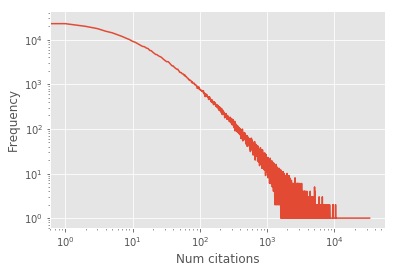

In [47]:
plt.loglog(citation_distribution.index, citation_distribution.values)
plt.xlabel('Num citations')
plt.ylabel('Frequency')
plt.show()

## Early Career Prod. vs Final Success (ID file)

In [84]:
credible_authors.sort_values(by='early_career_prod', inplace=True)

In [85]:
x = credible_authors['early_career_prod']
y = credible_authors['final_citation_count']

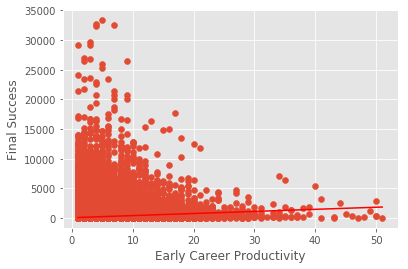

In [86]:
fig, ax = plt.subplots()
plt.scatter(x, y)
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.xlabel('Early Career Productivity')
plt.ylabel('Final Success')
# plt.xlim(0, 50)
# plt.ylim(0,200)
plt.show()

In [87]:
credible_authors_no_uncited = credible_authors.dropna()

In [88]:
x = credible_authors_no_uncited['early_career_prod']
y = credible_authors_no_uncited['final_citation_count']

In [89]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value)
print(slope, intercept)

0.16015844081055314
35.22126654505476 38.74846641945885


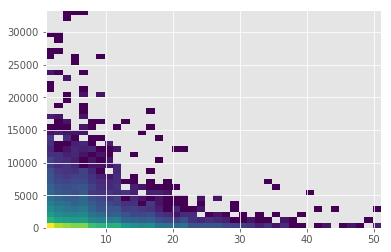

In [90]:
fig, axs = plt.subplots()
axs.hist2d(x, y, bins=40, norm=colors.LogNorm())
plt.show()

## Early Career Prod. vs Early Career Qual. (IDs file)

In [91]:
credible_authors.sort_values(by='early_career_prod', inplace=True)

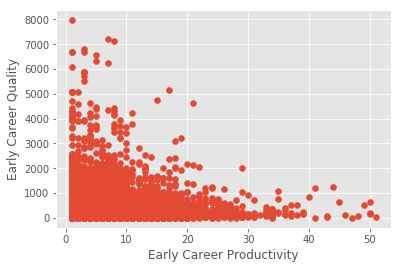

In [92]:
plt.scatter(credible_authors['early_career_prod'], credible_authors['early_career_qual'])
plt.xlabel('Early Career Productivity')
plt.ylabel('Early Career Quality')
plt.show()